In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
data = pd.read_csv('./mnist/mnist_train.csv')

In [69]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [71]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [72]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [73]:
def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [74]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [75]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def ReLU_deriv(Z):
    return Z > 0

In [76]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [77]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [78]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [79]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [80]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 7 9 ... 9 9 9] [2 9 8 ... 4 1 1]
0.11859523042763437
Iteration:  10
[1 7 3 ... 9 8 8] [2 9 8 ... 4 1 1]
0.2442244783809895
Iteration:  20
[1 7 3 ... 9 8 8] [2 9 8 ... 4 1 1]
0.35246360107798436
Iteration:  30
[1 7 3 ... 9 1 8] [2 9 8 ... 4 1 1]
0.4373633451414431
Iteration:  40
[1 7 3 ... 9 1 1] [2 9 8 ... 4 1 1]
0.5060594247360125
Iteration:  50
[2 7 3 ... 9 1 1] [2 9 8 ... 4 1 1]
0.56034848048272
Iteration:  60
[2 7 3 ... 9 1 1] [2 9 8 ... 4 1 1]
0.6011966304513636
Iteration:  70
[2 7 3 ... 4 1 1] [2 9 8 ... 4 1 1]
0.6323497008423872
Iteration:  80
[2 7 3 ... 4 1 1] [2 9 8 ... 4 1 1]
0.6580111527314022
Iteration:  90
[2 7 8 ... 4 1 1] [2 9 8 ... 4 1 1]
0.6807064526517399
Iteration:  100
[2 7 8 ... 4 1 1] [2 9 8 ... 4 1 1]
0.7001813590060848
Iteration:  110
[2 7 8 ... 4 1 1] [2 9 8 ... 4 1 1]
0.7154697537246394
Iteration:  120
[2 7 8 ... 4 1 1] [2 9 8 ... 4 1 1]
0.7285547212664621
Iteration:  130
[2 7 8 ... 4 1 1] [2 9 8 ... 4 1 1]
0.7396566043492263
Iteration:  140
[

In [81]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

N: 54427
Prediction:  [4]
Label:  4


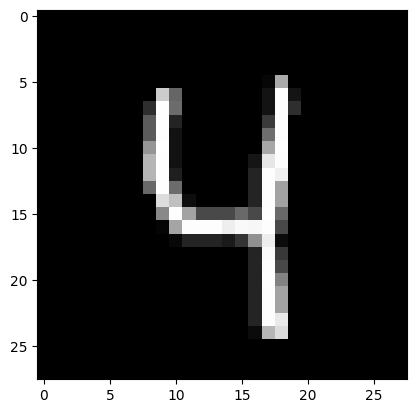

In [128]:
num = np.random.randint(0, 55001)
print("N:", num)
test_prediction(num, W1, b1, W2, b2)

In [102]:
np.random.randint(0, 55001)

26042